In [65]:
import scapy.all as sc
import matplotlib.pyplot as plt
from matplotlib import dates

import pandas as pd
import numpy as np
import datetime

In [66]:
online_to_4 = sc.rdpcap('data/analyze_online_to_4.cap')
online_to_2 = sc.rdpcap('data/analyze_online_to_2.cap')
online_to_1 = sc.rdpcap('data/analyze_online_to_1.cap')
online_to_05 = sc.rdpcap('data/analyze_online_to_05.cap')

In [67]:
def pkts_to_grouped_df(pkts):
    times = [p.time for p in pkts]
    data = [p.len for p in pkts]
    datetimes = [datetime.datetime.fromtimestamp(c) for c in times]
    d = {'timestamp': datetimes, 'pkt_sizes': data}
    df = pd.DataFrame(data=d)
    grouped = df.groupby('timestamp')['pkt_sizes'].sum() / 1000 * 8
    grouped = grouped.to_frame()
    grouped['timestamp'] = grouped.index
    # Start time at "zero"
    print("grouped['timestamp'][0]", grouped['timestamp'][0])
    grouped['time_elapsed'] = grouped['timestamp'] - grouped['timestamp'][0]
    minutes_elapsed = [t.total_seconds() /60 for t in grouped.time_elapsed]
    grouped['minutes_elapsed'] = minutes_elapsed
    
    return grouped

In [83]:
online_to_4_df = pkts_to_grouped_df(online_to_4)
online_to_2_df = pkts_to_grouped_df(online_to_2)
online_to_1_df = pkts_to_grouped_df(online_to_1)
online_to_05_df = pkts_to_grouped_df(online_to_05)


grouped['timestamp'][0] 2020-12-05 09:49:58
grouped['timestamp'][0] 2020-12-05 10:39:54
grouped['timestamp'][0] 2020-12-05 10:11:56
grouped['timestamp'][0] 2020-12-05 10:23:32


In [92]:
baseline = online_to_4_df[online_to_4_df['minutes_elapsed'] <= 4]
bn_4 = online_to_4_df[online_to_4_df['minutes_elapsed'] >= 6]
bn_2 = online_to_2_df[online_to_2_df['minutes_elapsed'] >= 6]
bn_1 = online_to_1_df[online_to_1_df['minutes_elapsed'] >= 6]
bn_05 = online_to_05_df[online_to_05_df['minutes_elapsed'] >= 6]

Text(0, 0.5, 'Video Flow Throughput (kbps)')

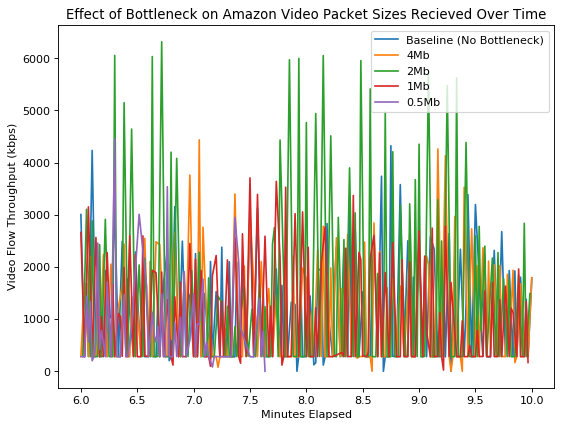

In [93]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(baseline['minutes_elapsed']+6, baseline['pkt_sizes'], label='Baseline (No Bottleneck)')
plt.plot(bn_4['minutes_elapsed'], bn_4['pkt_sizes'], label='4Mb')
plt.plot(bn_2['minutes_elapsed'], bn_2['pkt_sizes'], label='2Mb')
plt.plot(bn_1['minutes_elapsed'], bn_1['pkt_sizes'], label='1Mb')
plt.plot(bn_05['minutes_elapsed'], bn_05['pkt_sizes'], label='0.5Mb')

plt.legend()
plt.title('Effect of Bottleneck on Amazon Video Packet Sizes Recieved Over Time')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

In [94]:
competing = sc.rdpcap('data/analyze_competing.cap')
competing_df = pkts_to_grouped_df(competing)

grouped['timestamp'][0] 2020-12-05 10:51:37


Text(0, 0.5, 'Video Flow Throughput (kbps)')

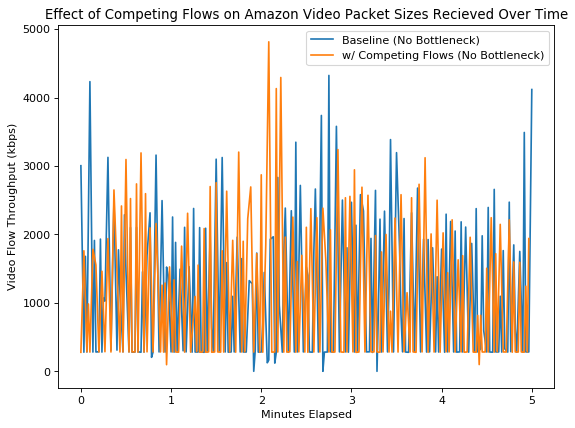

In [95]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

baseline = online_to_4_df[online_to_4_df['minutes_elapsed'] <= 5]

plt.plot(baseline['minutes_elapsed'], baseline['pkt_sizes'], label='Baseline (No Bottleneck)')
plt.plot(competing_df['minutes_elapsed'], competing_df['pkt_sizes'], label='w/ Competing Flows (No Bottleneck)')

plt.legend()
plt.title('Effect of Competing Flows on Amazon Video Packet Sizes Recieved Over Time')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')


Text(0, 0.5, 'Video Flow Throughput (kbps)')

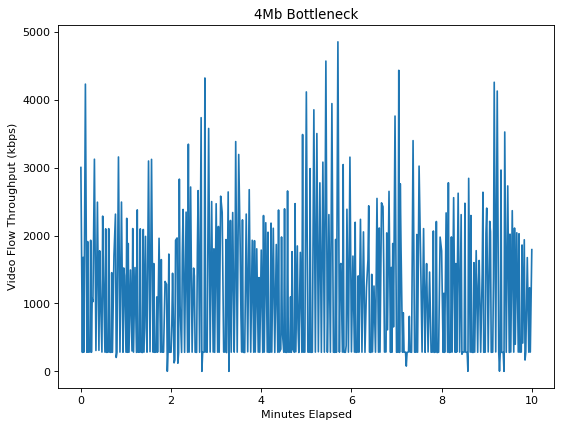

In [96]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(online_to_4_df['minutes_elapsed'], online_to_4_df['pkt_sizes'])
plt.title('4Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

Text(0, 0.5, 'Video Flow Throughput (kbps)')

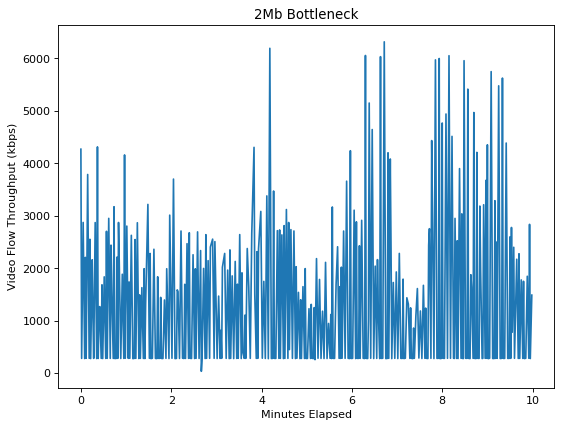

In [80]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(online_to_2_df['minutes_elapsed'], online_to_2_df['pkt_sizes'])
plt.title('2Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

Text(0, 0.5, 'Video Flow Throughput (kbps)')

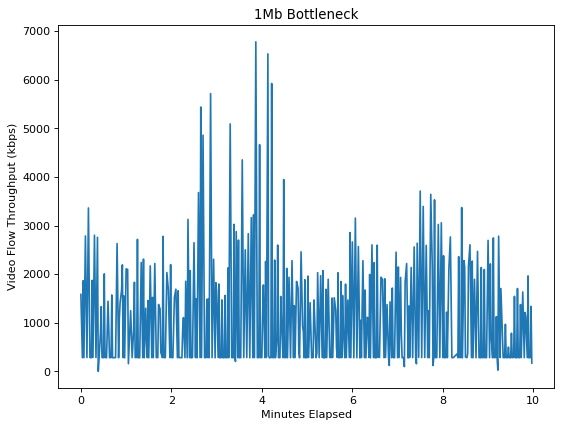

In [81]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(online_to_1_df['minutes_elapsed'], online_to_1_df['pkt_sizes'])
plt.title('1Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

Text(0, 0.5, 'Video Flow Throughput (kbps)')

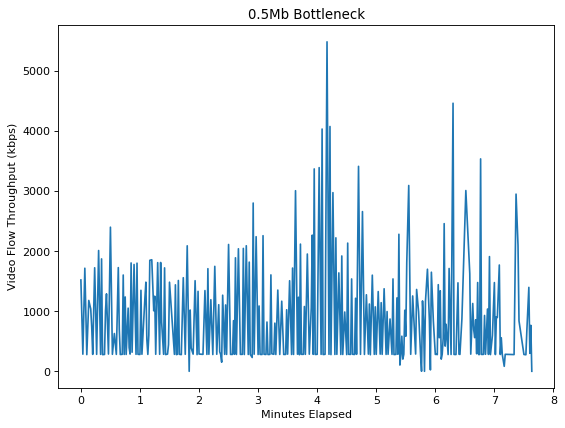

In [97]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(online_to_05_df['minutes_elapsed'], online_to_05_df['pkt_sizes'])
plt.title('0.5Mb Bottleneck')
plt.xlabel('Minutes Elapsed')
plt.ylabel('Video Flow Throughput (kbps)')

In [54]:
500 * 1024/ 1000 * 8

4096.0